<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 144.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 191.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 152.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 154.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 164.8 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)
print(df)

       ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0      Employed, full-time                     


### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




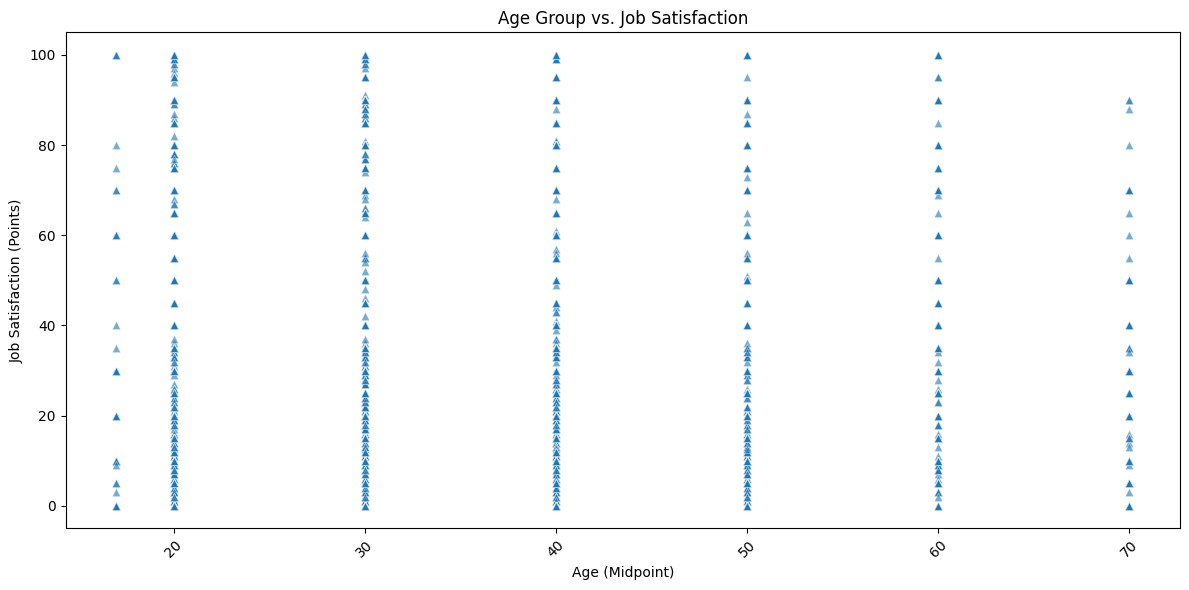

In [4]:

df_clean = df[['Age', 'JobSatPoints_6']].dropna()

# Define mapping of Age to numeric midpoint
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Map age strings to numeric midpoints
df_clean['Agemap'] = df_clean['Age'].map(age_map)

# Drop rows where Agemap is None
df_clean = df_clean.dropna(subset=['Agemap'])

# Plot using stripplot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean, x='Agemap', y='JobSatPoints_6',alpha =0.6,marker ='^')

plt.title('Age Group vs. Job Satisfaction')
plt.xlabel('Age (Midpoint)')
plt.ylabel('Job Satisfaction (Points)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


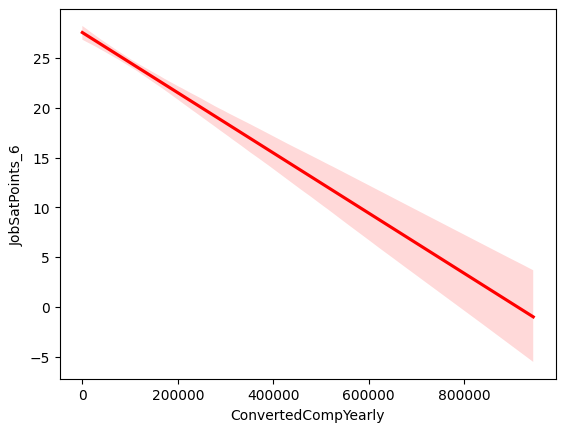

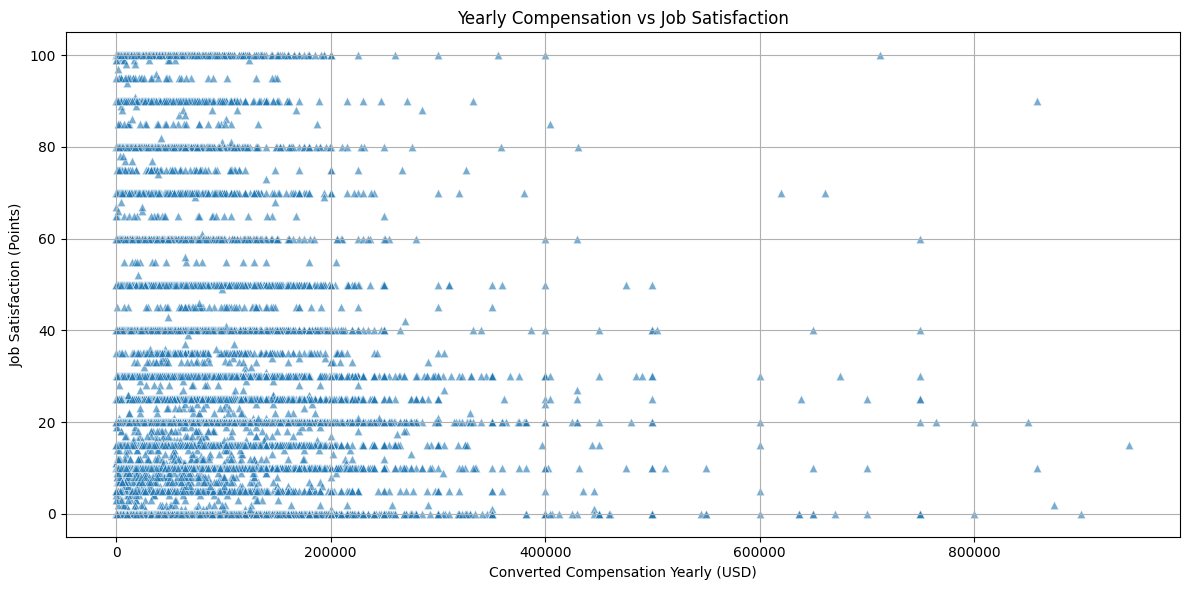

In [5]:
## Write your code here
# Make sure column names are correct
df_clean = df[['ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Filter extreme compensation values to reduce skew
df_clean = df_clean[df_clean['ConvertedCompYearly'] < 1000000]

sns.regplot(data=df_clean, x='ConvertedCompYearly', y='JobSatPoints_6',
            scatter=False, color='red', line_kws={'label': 'Trend Line'})

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_clean,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    marker='^',         # Triangle marker
    alpha=0.6
)

# Add labels and grid
plt.title('Yearly Compensation vs Job Satisfaction')
plt.xlabel('Converted Compensation Yearly (USD)')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.tight_layout()
plt.show()





### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


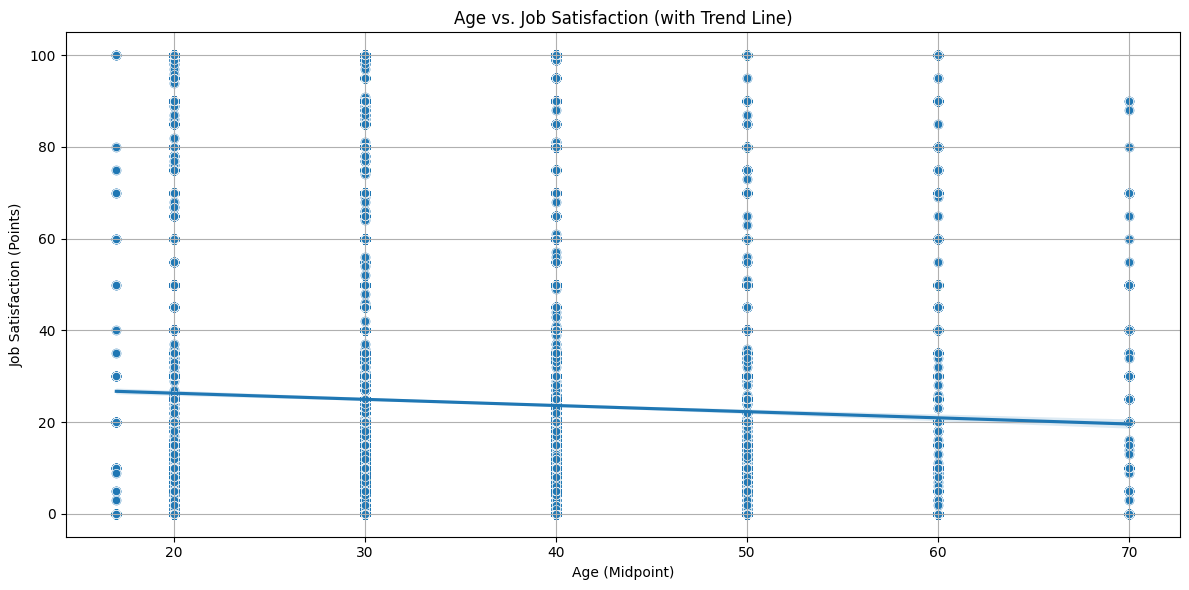

In [6]:
## Write your code here
# Step 1: Define Age to numeric midpoint mapping
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}
df_clean = df[['Age', 'JobSatPoints_6']].dropna() 
df_clean['Agemap'] = df_clean['Age'].map(age_map) 
df_clean = df_clean.dropna(subset =['Agemap']) 

plt.figure(figsize = (12,6))
sns.regplot(data = df_clean, x ='Agemap', y='JobSatPoints_6') 
sns.scatterplot(data = df_clean, x='Agemap', y='JobSatPoints_6')
# Final plot touches
plt.title('Age vs. Job Satisfaction (with Trend Line)')
plt.xlabel('Age (Midpoint)')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.tight_layout()
plt.show()



#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


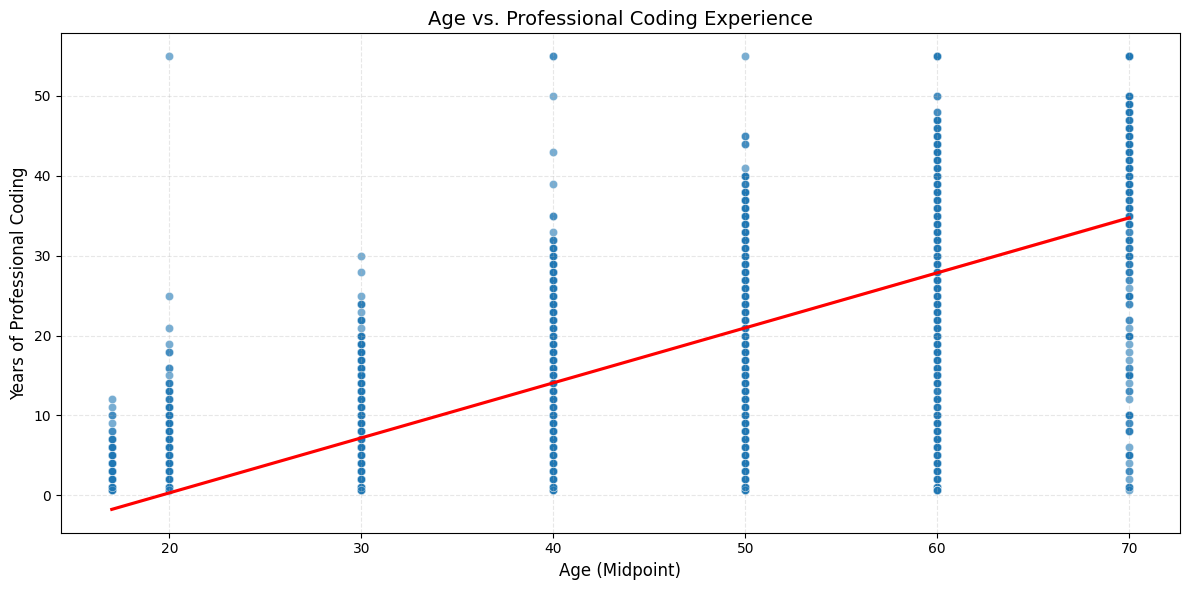

In [7]:

age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Clean and prepare the data
df_clean = df[['Age', 'YearsCodePro']].dropna()
df_clean['Agemap'] = df_clean['Age'].map(age_map)
df_clean = df_clean.dropna(subset=['Agemap'])

# Function to convert YearsCodePro into numeric values
def map_experience(years):
    if isinstance(years, str):
        if years.strip() == 'Less than 1 year':
            return 0.6
        elif years.strip() == 'More than 50 years':
            return 55
    try:
        return float(years)
    except:
        return None

# Apply mapping
df_clean['Years_map'] = df_clean['YearsCodePro'].apply(map_experience)
df_clean = df_clean.dropna(subset=['Years_map'])

# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean, x='Agemap', y='Years_map', alpha=0.6)
sns.regplot(data=df_clean, x='Agemap', y='Years_map', scatter=False, color='red')

# Add labels and styling
plt.title('Age vs. Professional Coding Experience', fontsize=14)
plt.xlabel('Age (Midpoint)', fontsize=12)
plt.ylabel('Years of Professional Coding', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


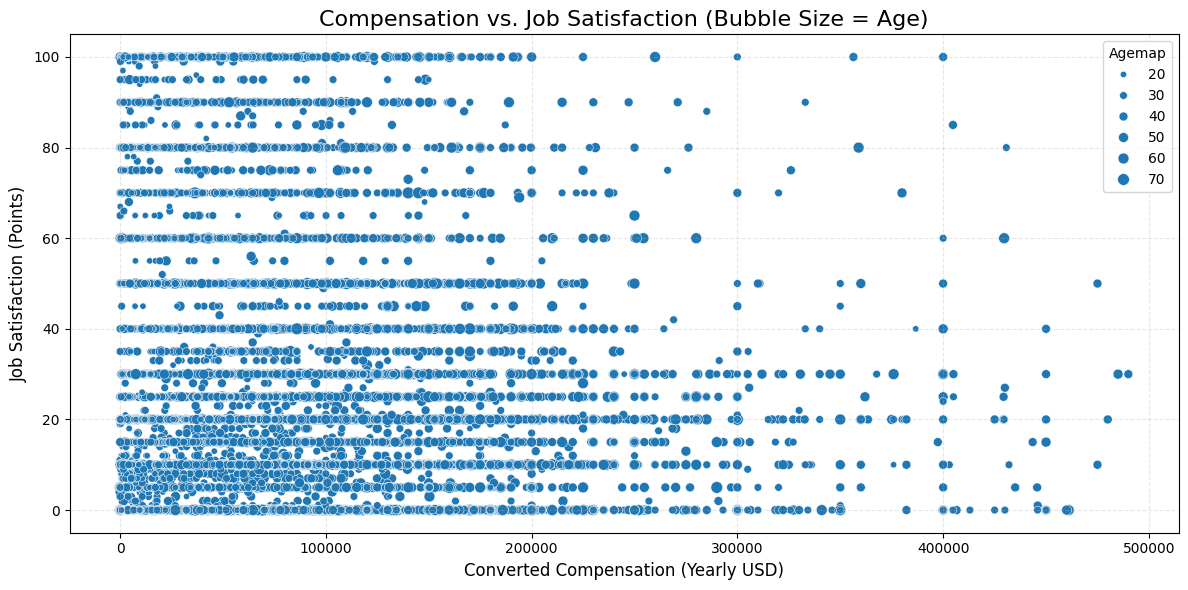

In [8]:
## Write your code here
age ={
    'Under 18 years old': 17,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}
df_clean = df[['ConvertedCompYearly','JobSatPoints_6', 'Age']].dropna() 
df_clean['Agemap'] = df_clean['Age'].map(age)

df_clean = df_clean[df_clean['ConvertedCompYearly'] < 500000] 

plt.figure(figsize = (12,6))
sns.scatterplot(data =df_clean , x ='ConvertedCompYearly', y='JobSatPoints_6', size ='Agemap')
plt.title('Compensation vs. Job Satisfaction (Bubble Size = Age)', fontsize=16)
plt.xlabel('Converted Compensation (Yearly USD)', fontsize=12)
plt.ylabel('Job Satisfaction (Points)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()




#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


0                                                  NaN
1    Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                   C#
3    C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4              C++;HTML/CSS;JavaScript;Lua;Python;Rust
Name: LanguageHaveWorkedWith, dtype: object


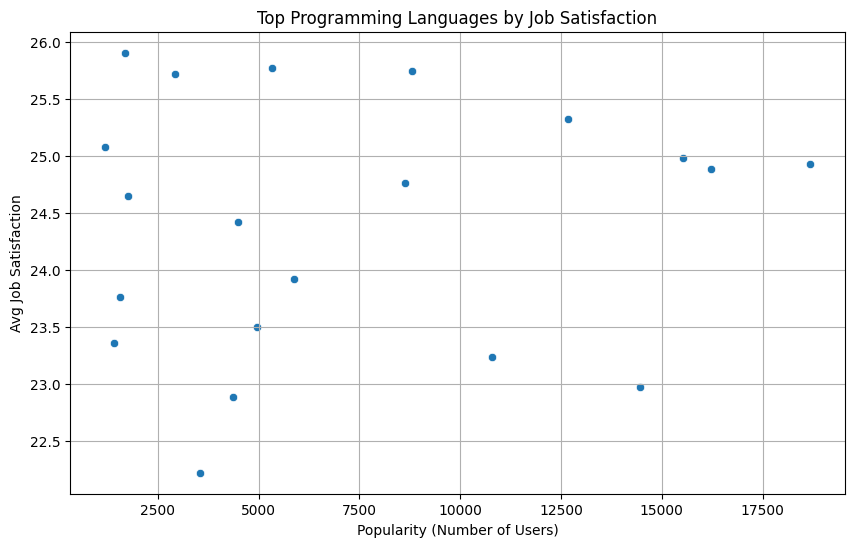

In [9]:
## Write your code here
df_lang = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']].dropna()  
print(df['LanguageHaveWorkedWith'].head()) 
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';') 
df_lang = df_lang.explode('LanguageHaveWorkedWith') 

lang_stats = df_lang.groupby('LanguageHaveWorkedWith').agg(
    Popularity=('LanguageHaveWorkedWith', 'count'), 
    AvgJobSat =('JobSatPoints_6', 'mean') 
).reset_index() 

top_langs = lang_stats.sort_values('Popularity', ascending=False).head(20) 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_langs, x='Popularity', y='AvgJobSat')
plt.title('Top Programming Languages by Job Satisfaction')
plt.xlabel('Popularity (Number of Users)')
plt.ylabel('Avg Job Satisfaction')
plt.grid(True)
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


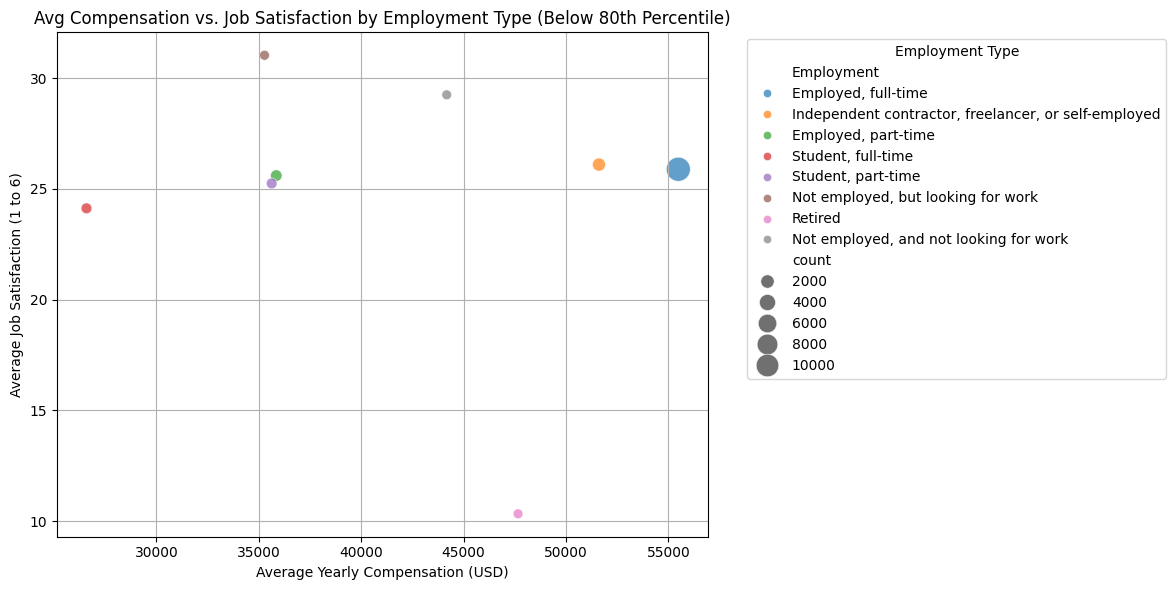

In [19]:
## Write your code here

df_clean = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']].dropna()


comp_80 = df_clean['ConvertedCompYearly'].quantile(0.8)
df_filtered = df_clean[df_clean['ConvertedCompYearly'] <= comp_80].copy()

# Split and explode Employment if multiple types are listed
df_filtered['Employment'] = df_filtered['Employment'].str.split(';')
df_filtered = df_filtered.explode('Employment')
df_filtered['Employment'] = df_filtered['Employment'].str.strip()  # remove extra spaces

# Group by clean Employment type
EMP_STATS = df_filtered.groupby('Employment').agg( 
    AverageCompensation=('ConvertedCompYearly', 'mean'), 
    AvgJobSat=('JobSatPoints_6', 'mean'),
    count=('Employment', 'count') 
).reset_index()

# Filter to top 10 Employment types by count to avoid clutter
EMP_STATS = EMP_STATS.sort_values('count', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))  
sns.scatterplot(
    data=EMP_STATS,
    x='AverageCompensation',
    y='AvgJobSat',
    size='count',
    hue='Employment',
    legend='brief',
    sizes=(50, 300),
    alpha=0.7
)

plt.title('Avg Compensation vs. Job Satisfaction by Employment Type (Below 80th Percentile)')
plt.xlabel('Average Yearly Compensation (USD)')
plt.ylabel('Average Job Satisfaction (1 to 6)')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


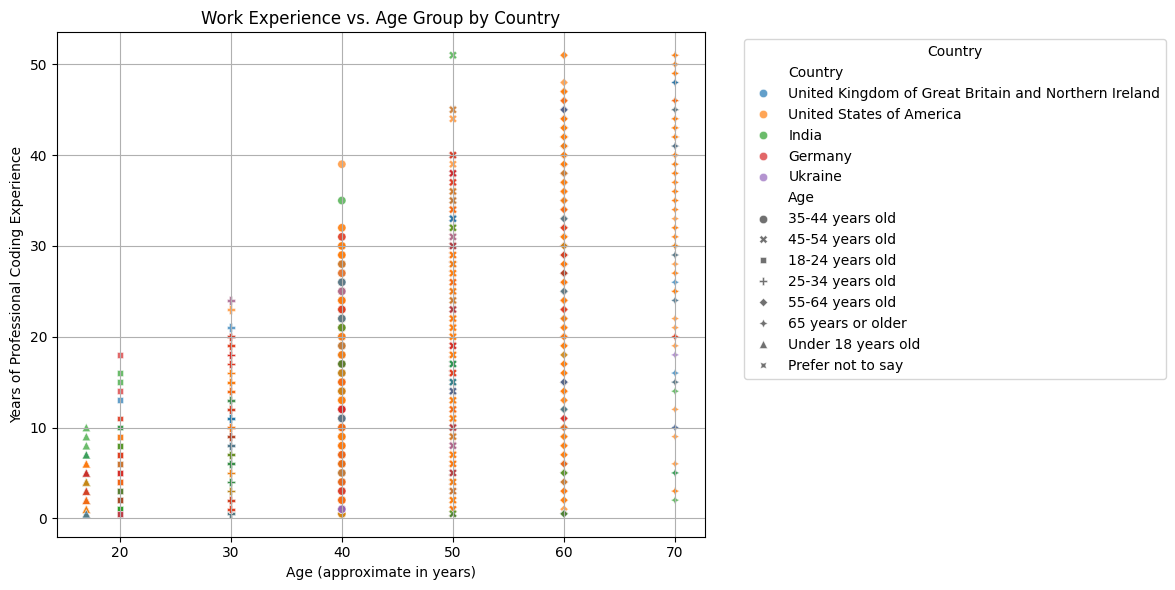

In [26]:
## Write your code here
df_clean = df[['YearsCodePro', 'Age', 'Country']].dropna() 
df_clean['YearsCodePro'] =df_clean['YearsCodePro'].replace({'Less than 1 year': 0.5, 'More than 50 years': 51})  
df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors ='coerce') 
age_map ={
    'Under 18 years old': 17,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}
df_clean['Agemap'] = df_clean['Age'].map(age_map) 
top5 = df_clean['Country'].value_counts().head(5).index 
df_top = df_clean[df_clean['Country'].isin(top5)]  

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_top,
    x='Agemap',
    y='YearsCodePro',
    hue='Country',
    style='Age',  # Optional: use marker styles for Age groups
    alpha=0.7
)

plt.title('Work Experience vs. Age Group by Country')
plt.xlabel('Age (approximate in years)')
plt.ylabel('Years of Professional Coding Experience')
plt.legend(title ='Country', bbox_to_anchor=(1.05, 1),loc ='best')
plt.grid(True)
plt.tight_layout()
plt.show()



### Final Step: Review

With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
